In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing the dataset
df=pd.read_csv("train.csv")

In [5]:
#Shape
df.shape

(891, 12)

In [6]:
#Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#droping the cabin column
df.drop(columns=['Cabin'],inplace=True)

In [19]:
#Filling missing values for age column
df['Age']=df['Age'].fillna(df['Age'].mean())

In [21]:
#finding the most appeared value in embarked column
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
#filling the most appeared value in embarked column
df['Embarked']=df['Embarked'].fillna('S')

In [25]:
#changing the datatype of columns
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [29]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


#### Univariate Analysis

Out of 891 62 people died in the accident.


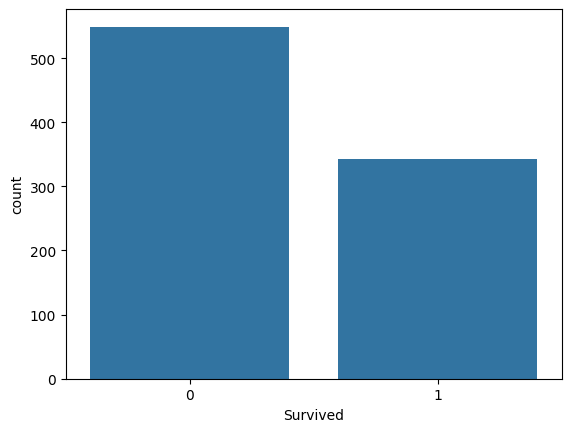

In [32]:
sns.countplot(x=df['Survived'])
death_percent = round((df['Survived'].value_counts().values[0]/891)*100)
print("Out of 891 {} people died in the accident.".format(death_percent))

<Axes: xlabel='Sex', ylabel='count'>

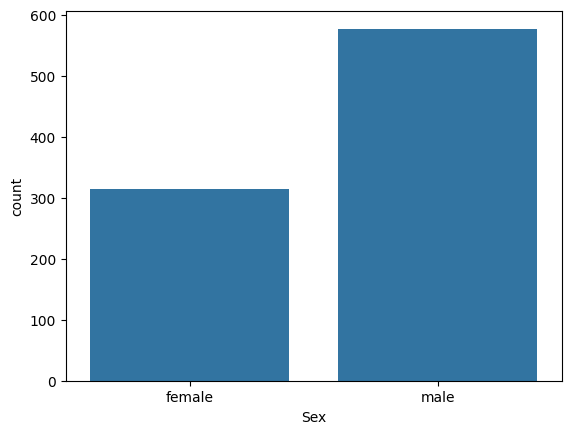

In [33]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='Parch', ylabel='count'>

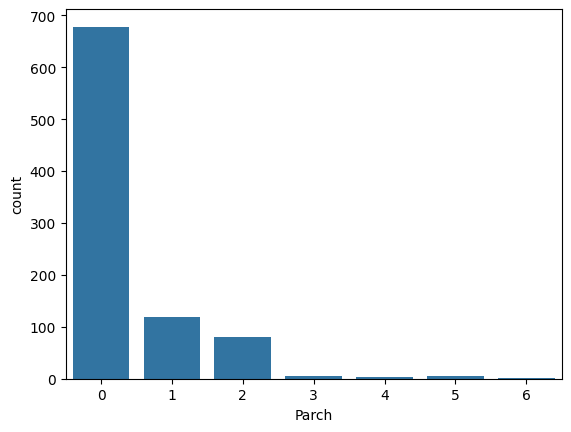

In [35]:
sns.countplot(x=df['Parch'])

<Axes: xlabel='Embarked', ylabel='count'>

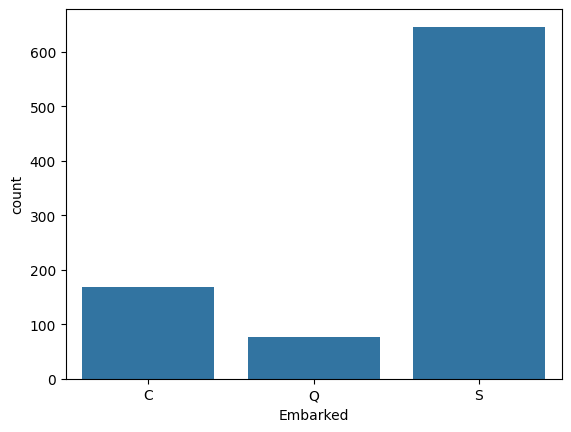

In [36]:
sns.countplot(x=df['Embarked'])

<Axes: xlabel='Age', ylabel='Count'>

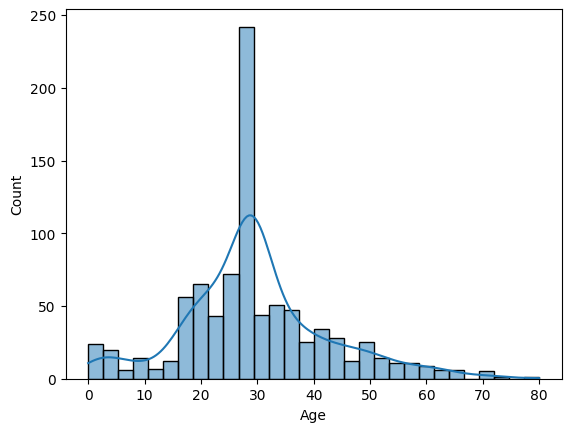

In [38]:
sns.histplot(x=df['Age'],kde=True)

<Axes: xlabel='Age'>

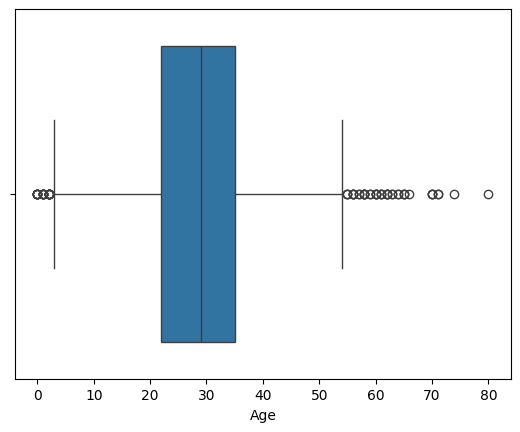

In [41]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

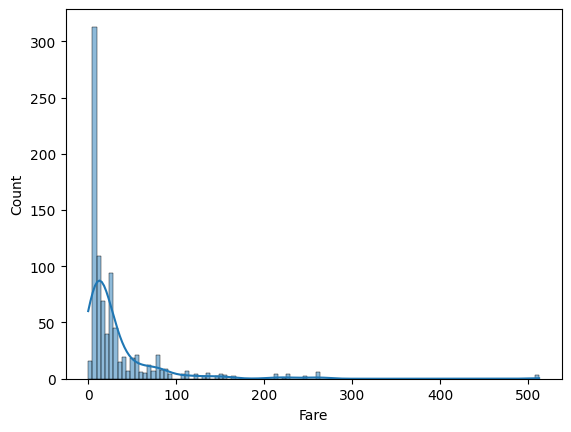

In [43]:
sns.histplot(x=df['Fare'],kde=True)

<Axes: xlabel='Fare'>

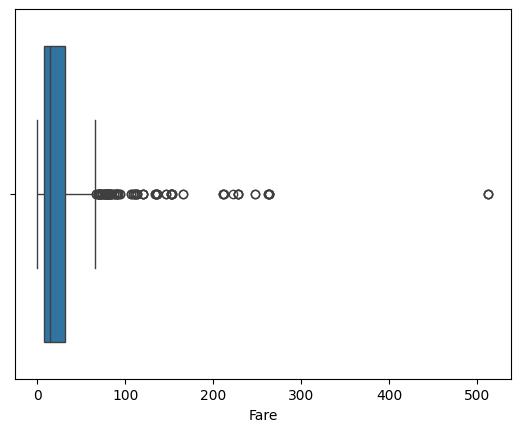

In [45]:
sns.boxplot(x=df['Fare'])

<Axes: xlabel='Pclass', ylabel='count'>

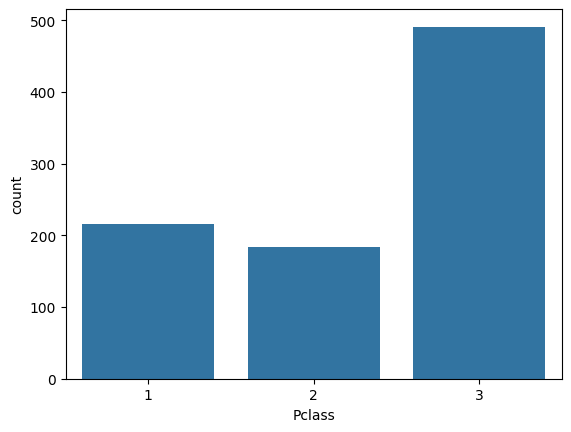

In [48]:
sns.countplot(x=df['Pclass'])

<Axes: xlabel='SibSp', ylabel='count'>

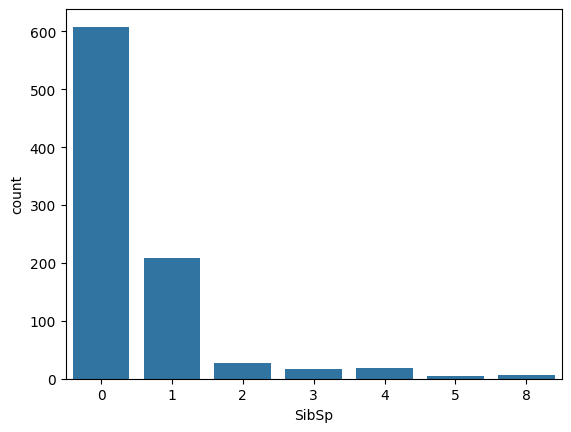

In [50]:
sns.countplot(x=df['SibSp'])

#### Multivariate Analysis

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


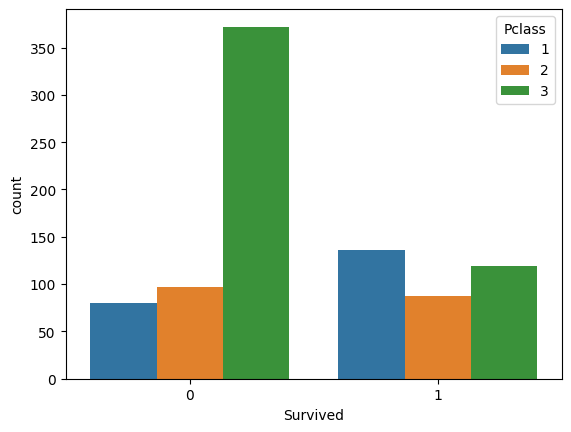

In [54]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


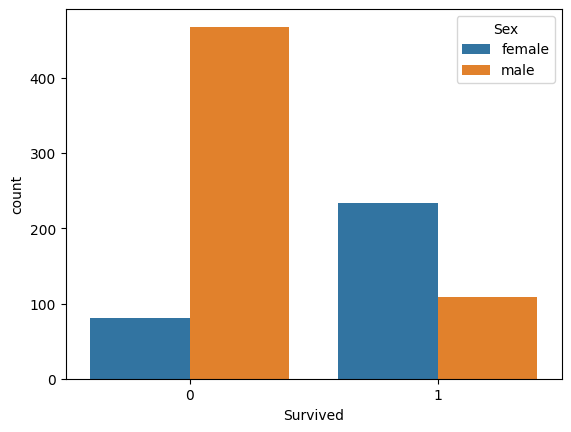

In [56]:
sns.countplot(x=df['Survived'],hue=df['Sex'])
pd.crosstab(df['Sex'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
Embarked,,
C,13.7,27.2
Q,8.6,8.8
S,77.8,64.0


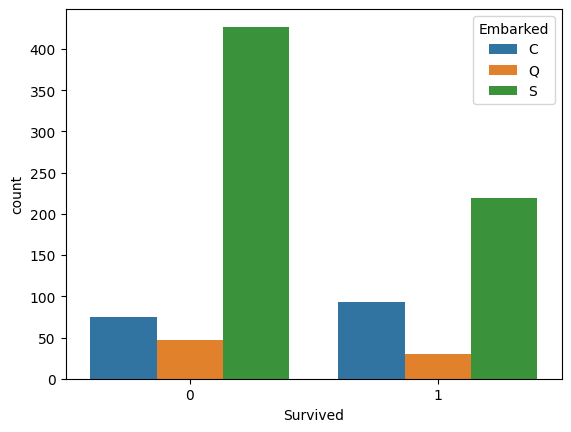

In [58]:
sns.countplot(x=df['Survived'],hue=df['Embarked'])
pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1))

<Axes: xlabel='Age', ylabel='Count'>

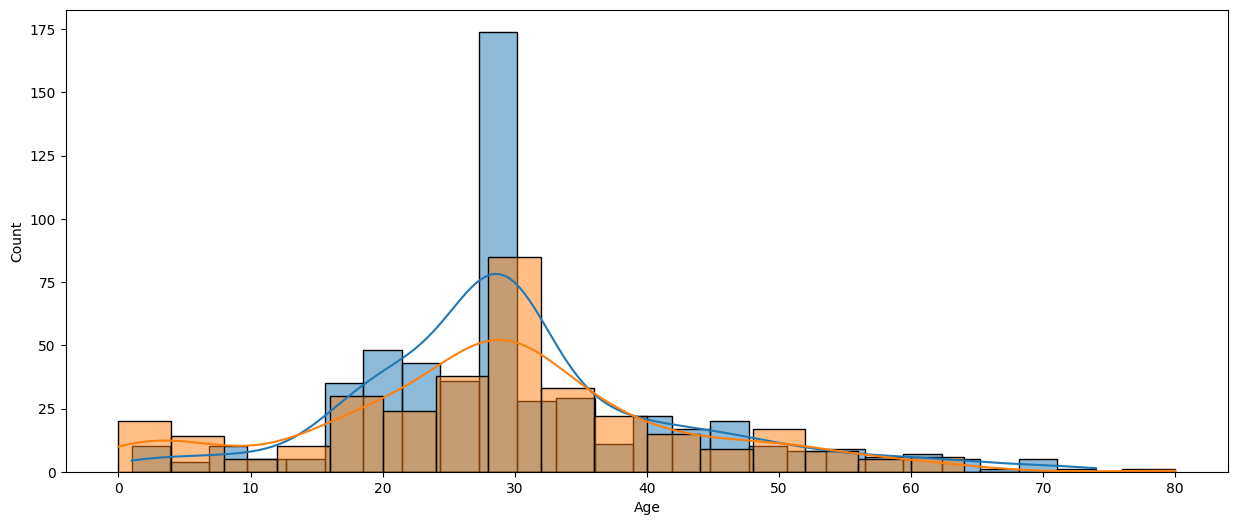

In [66]:
plt.figure(figsize=(15,6))
sns.histplot(df[df['Survived']==0]['Age'],kde=True)
sns.histplot(df[df['Survived']==1]['Age'],kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

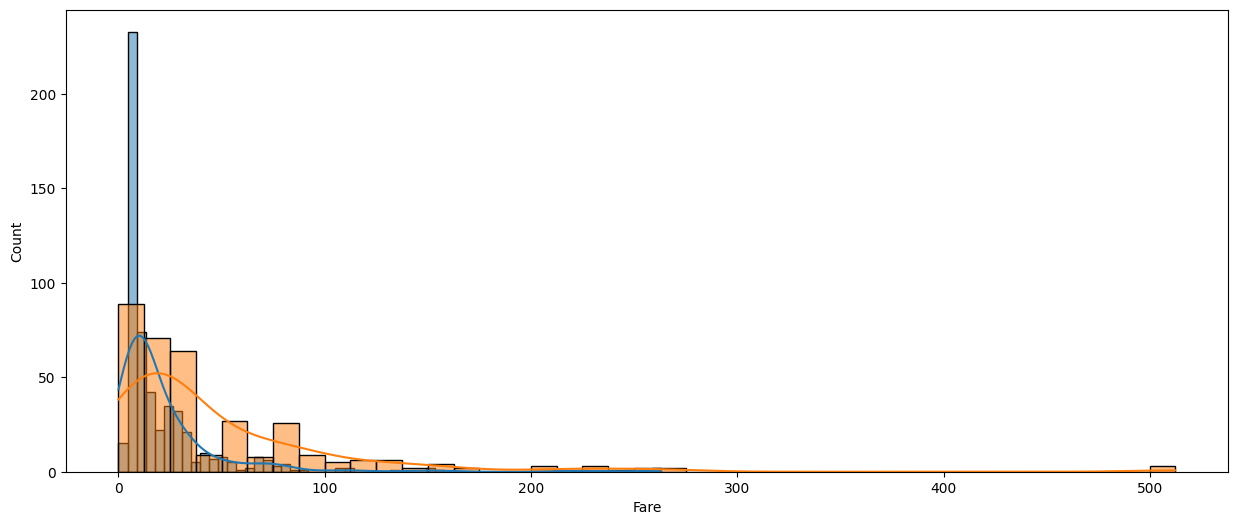

In [70]:
plt.figure(figsize=(15,6))
sns.histplot(df[df['Survived']==0]['Fare'],kde=True)
sns.histplot(df[df['Survived']==1]['Fare'],kde=True)

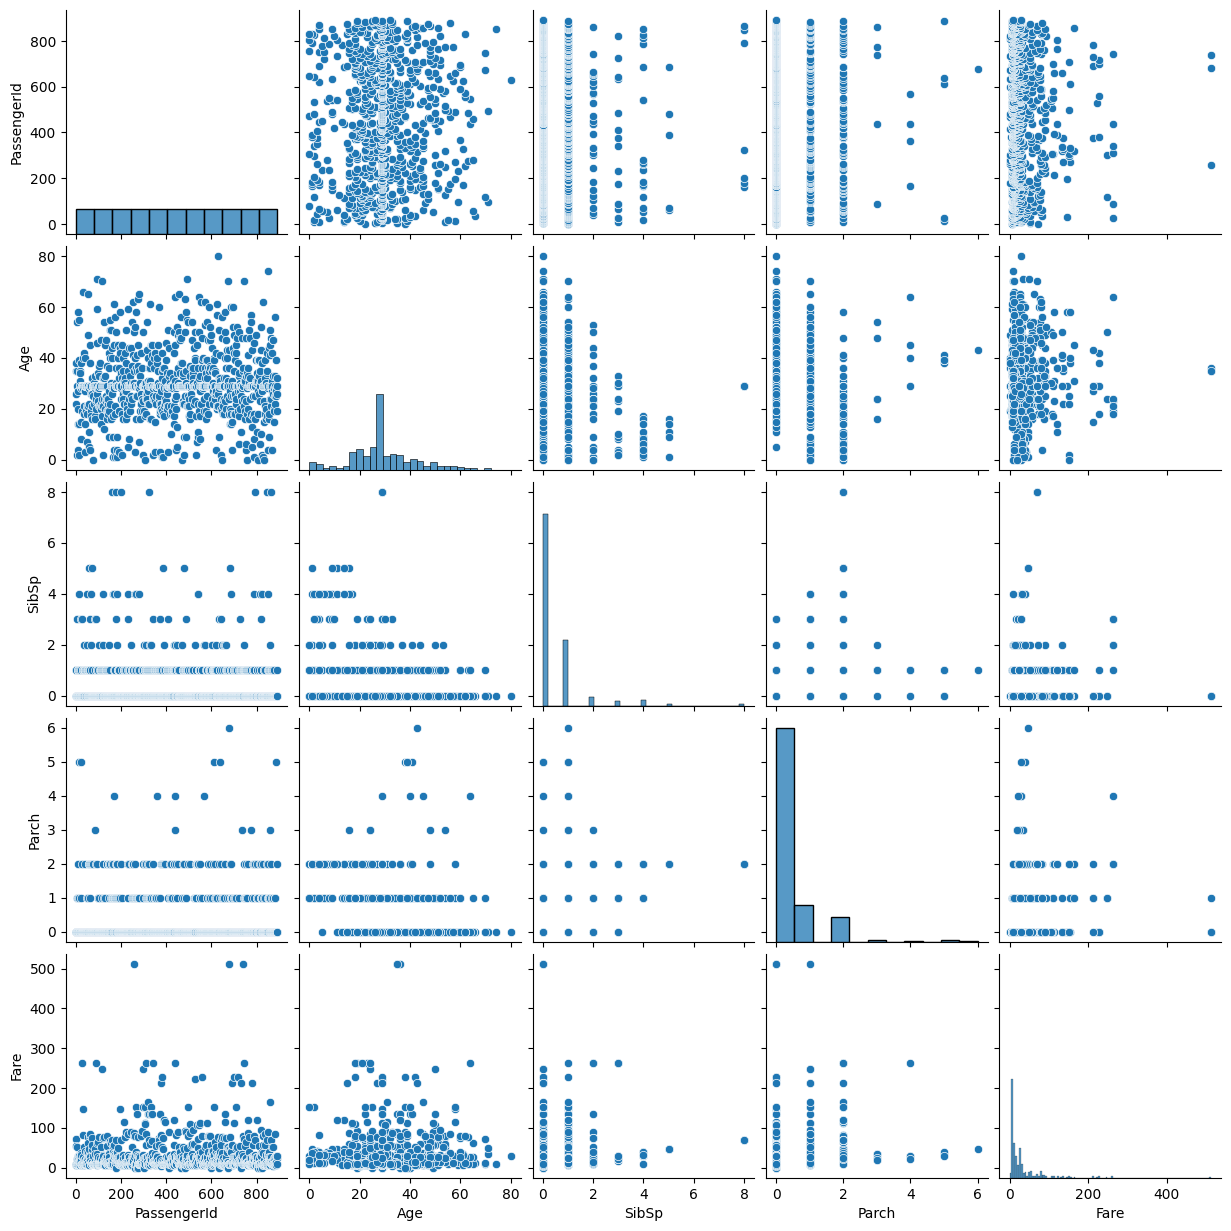

In [72]:
sns.pairplot(df)

<Axes: >

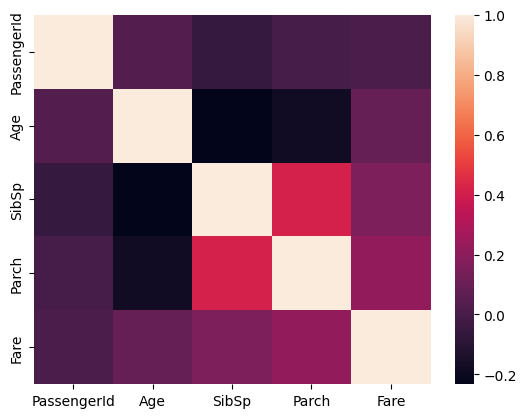

In [86]:
numeric_df=df.select_dtypes(include=['float','int'])
sns.heatmap(numeric_df.corr())

#### Feature Engineering

In [89]:
df['family_size']=df['Parch']+df['SibSp']

In [91]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19,0,0,349205,7.8958,S,0
229,230,0,3,"Lefebre, Miss. Mathilde",female,29,3,1,4133,25.4667,S,4
260,261,0,3,"Smith, Mr. Thomas",male,29,0,0,384461,7.7500,Q,0
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,29,0,0,PC 17585,79.2000,C,0
226,227,1,2,"Mellors, Mr. William John",male,19,0,0,SW/PP 751,10.5000,S,0


In [93]:
def family_type(number):
    if number == 0:
        return "Alone"
    elif number>0 and number<=4:
        return 'Medium'
    else:
        return 'Large'

In [95]:
df['family_type']=df['family_size'].apply(family_type)

In [97]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0000,S,5,Large
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39,1,1,17421,110.8833,C,2,Medium
803,804,1,3,"Thomas, Master. Assad Alexander",male,0,0,1,2625,8.5167,C,1,Medium
639,640,0,3,"Thorneycroft, Mr. Percival",male,29,1,0,376564,16.1000,S,1,Medium
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17,1,0,17474,57.0000,S,1,Medium


In [99]:
df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [101]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39,13507,55.9,S,Medium
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2,347088,27.9,S,Large
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37,113803,53.1,S,Medium
364,365,0,3,"O'Brien, Mr. Thomas",male,29,370365,15.5,Q,Medium
770,771,0,3,"Lievens, Mr. Rene Aime",male,24,345781,9.5,S,Alone


#### Detecting Outliers

In [110]:
#handling outliers from age column
df=df[df['Age']<df['Age'].mean()+3*df['Age'].std()]
df.shape

(884, 10)

In [114]:
#handling oultiers from fare column
Q1=np.percentile(df['Fare'],25)
Q3 = np.percentile(df['Fare'],75)

outlier_low=Q1-1.5*(Q3-Q1)
outlier_high=Q3+1.5*(Q3-Q1)

df=df[(df['Fare']>outlier_low)&(df['Fare']<outlier_high)]

In [116]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15,2659,14.4542,C,Medium
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,347082,31.2750,S,Large
764,765,0,3,"Eklund, Mr. Hans Linus",male,16,347074,7.7750,S,Alone
122,123,0,2,"Nasser, Mr. Nicholas",male,32,237736,30.0708,C,Medium
711,712,0,1,"Klaber, Mr. Herman",male,29,113028,26.5500,S,Alone


In [118]:
pd.get_dummies(data=df,columns=['Pclass','Sex','Embarked','family_type'],drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False
